In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, stats

In [100]:
transactions = pd.read_csv('creditcard.csv')
transactions.shape

(284807, 31)

In [101]:
transactions.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

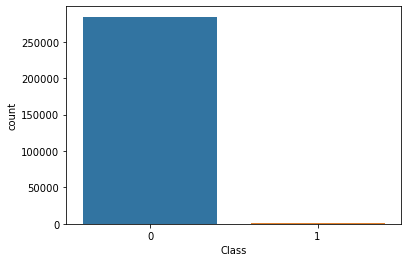

In [102]:
sns.countplot(transactions['Class'] ,data= transactions)

# Temos que balancear os dados para treino.

### Quantidade de transações fraudulentas

In [103]:
len(transactions[transactions['Class']==1])

492

### Fazendo o under sampling

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


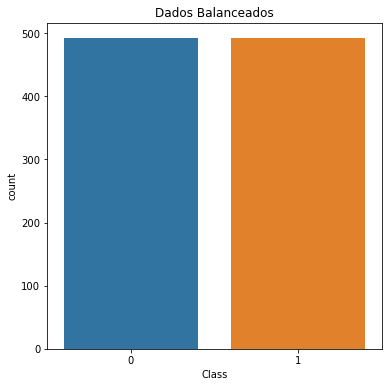

In [104]:
# Misturando o dataset
shuffled_df = transactions.sample(frac=1,random_state=4)

# separando os dados de acordo com a classe
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]

len_of_fraud = len(shuffled_df.loc[shuffled_df['Class'] == 1])

#Escolhendo aleatoriamente 492 registros
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=len_of_fraud, random_state=42)

# Concatenate dataframes
normalized_df = pd.concat([fraud_df, non_fraud_df])

#plot the dataset after the undersampling
plt.figure(figsize=(6, 6))
sns.countplot('Class', data=normalized_df)
plt.title('Dados Balanceados')
plt.show()

### Correlação antes e depois do balanceamento

Text(0.5, 1.0, 'Correlação antes do balanceio')

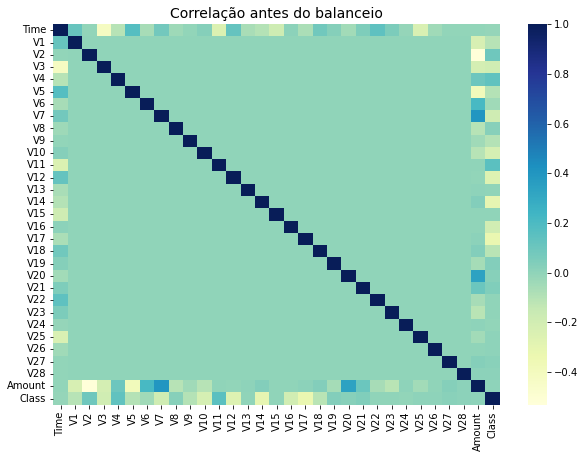

In [105]:
fig, ax = plt.subplots(figsize=(10,7))

corr_before = transactions.corr()
sns.heatmap(corr_before, cmap='YlGnBu')
ax.set_title("Correlação antes do balanceio", fontsize=14)

Text(0.5, 1.0, 'Correlação do dataset balanceado')

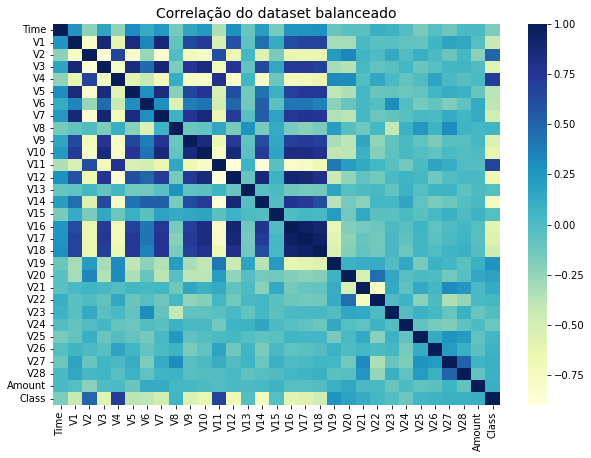

In [106]:
fig, ax = plt.subplots(figsize=(10,7))

corr_after = normalized_df.corr()
sns.heatmap(corr_after, cmap='YlGnBu')
ax.set_title("Correlação do dataset balanceado", fontsize=14)

In [107]:
melhores_correlacoes = corr_after[((corr_after['Class'] >= 0.6) | (corr_after['Class'] <= -0.6)) & (corr_after['Class'] <1)]
melhores_correlacoes = melhores_correlacoes.index.to_list()

Analisando variaveis com melhores correlações

In [108]:
melhores_correlacoes

['V4', 'V10', 'V11', 'V12', 'V14']

### Distribuição em relação ao valor da transação

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

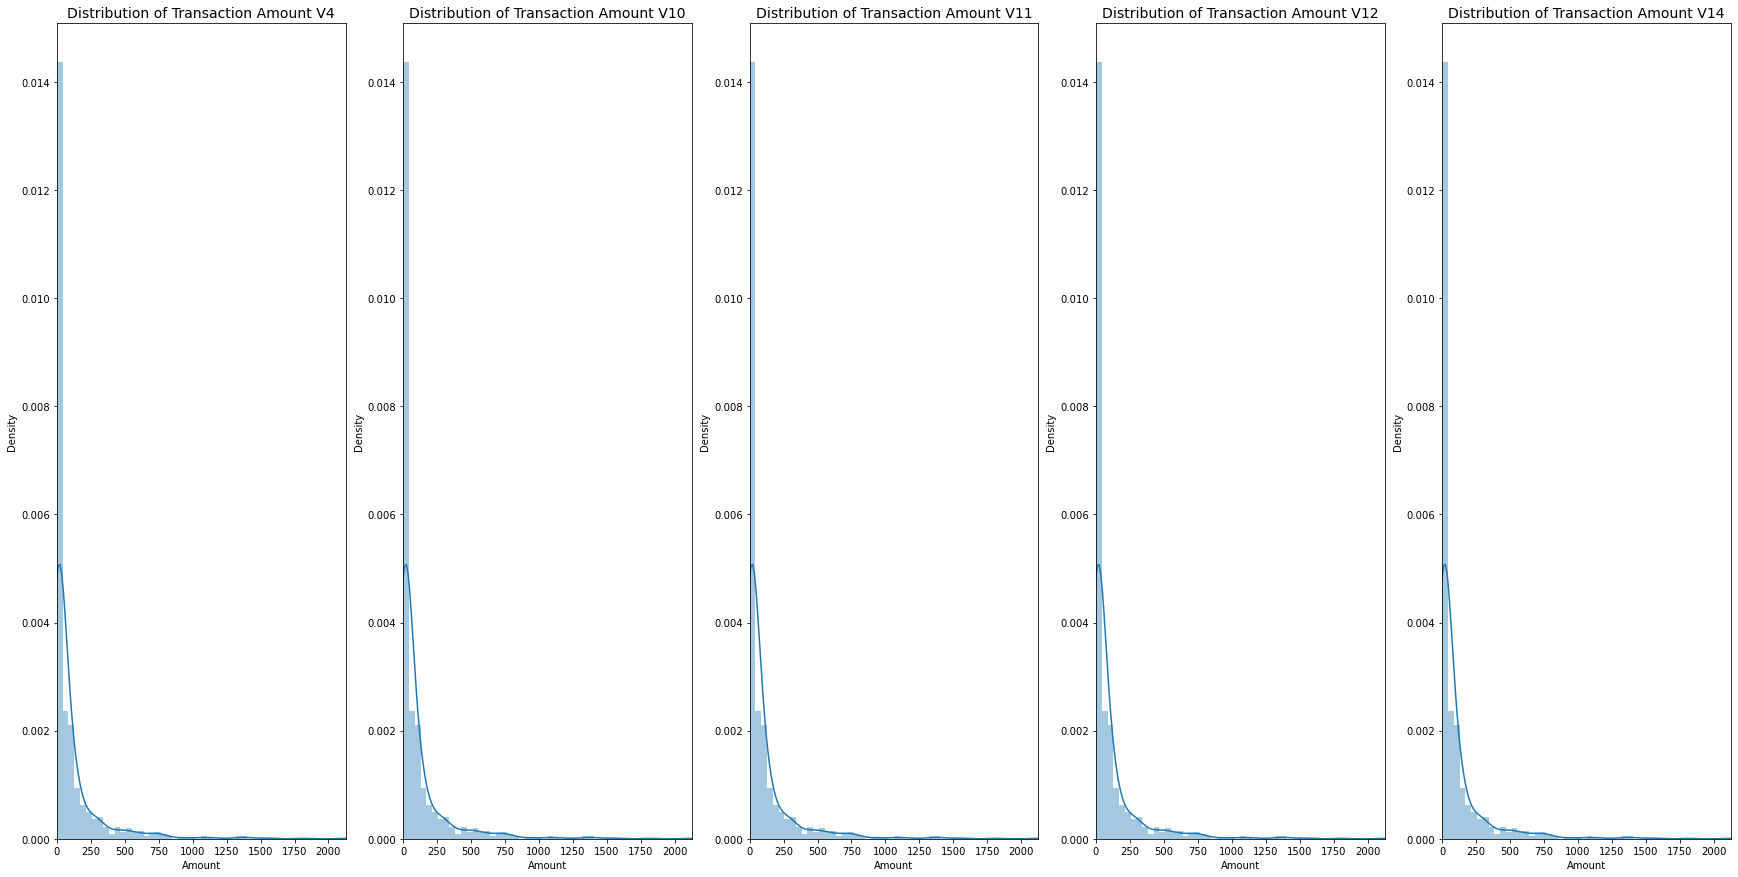

In [109]:
fig, ax = plt.subplots(1, len(melhores_correlacoes), figsize=(30, 15))
i = 0
for item in melhores_correlacoes:
    amount = normalized_df['Amount']
    sns.distplot(amount, ax=ax[i])
    title = "Distribution of Transaction Amount {}".format(item)
    ax[i].set_title(title, fontsize=14)
    ax[i].set_xlim([min(amount), max(amount)])
    i = i+1

### Distribuição em relação ao tempo Fraude x Não Fraude

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

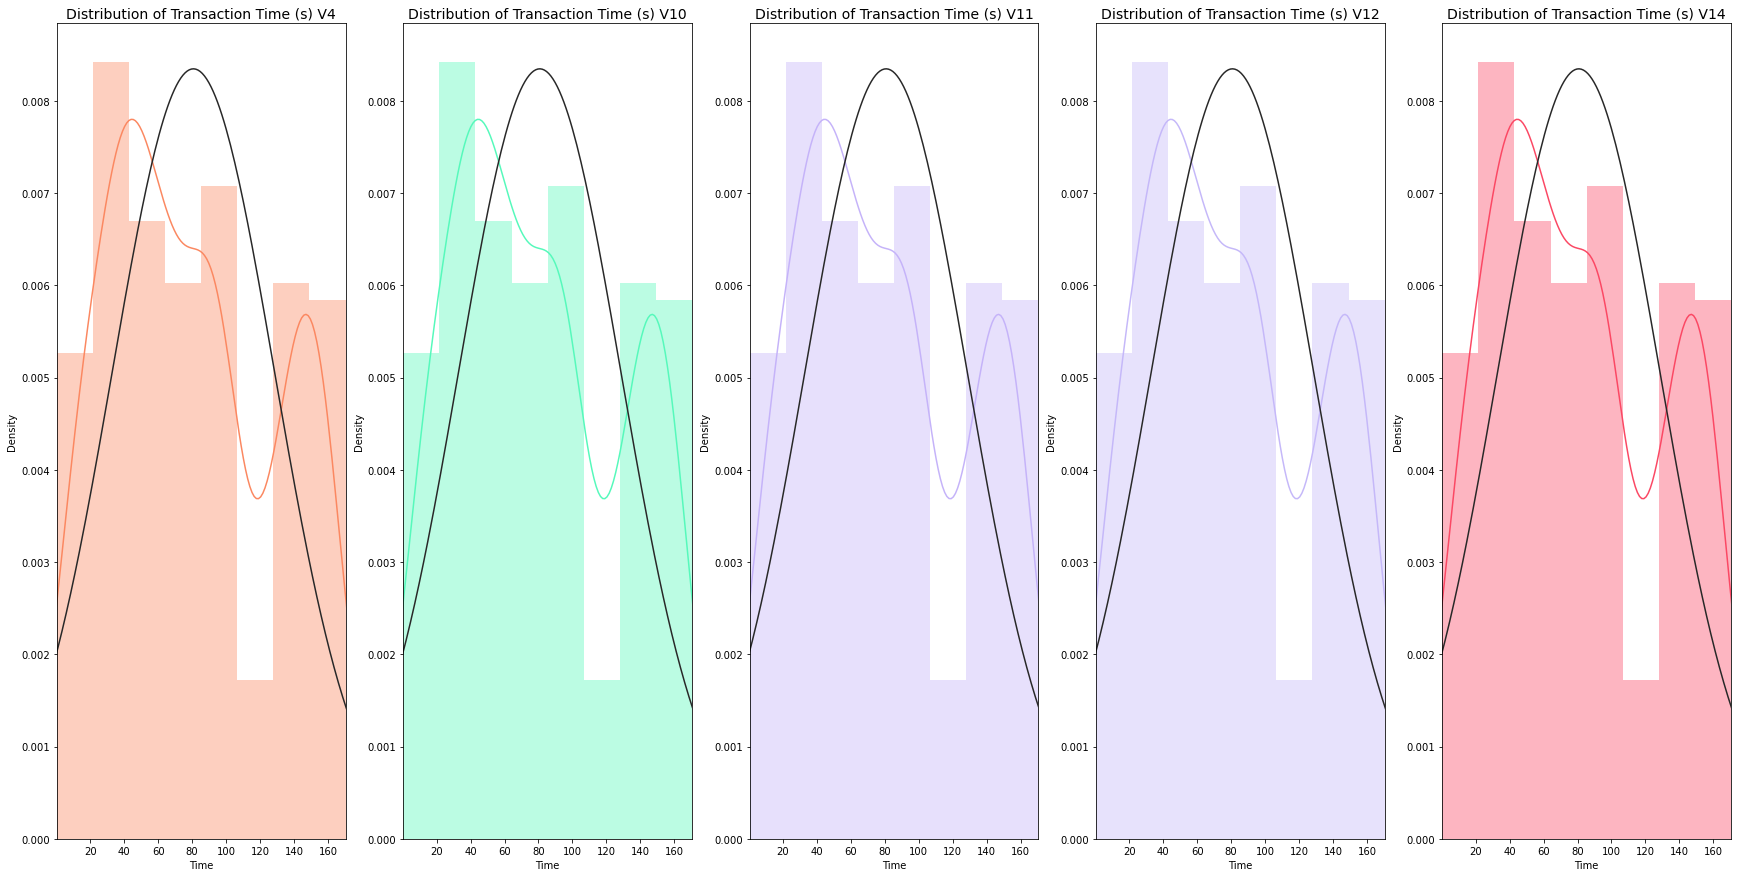

In [110]:
df_fraud = normalized_df[normalized_df['Class'] == 1]
colors = ['#FB8861', '#56F9BB', '#C5B3F9', '#C5B8F9','#FB4864']
fig, ax = plt.subplots(1, len(melhores_correlacoes), figsize=(30, 15))
i = 0
for item in melhores_correlacoes:
    amount = df_fraud['Time']/1000
    sns.distplot(amount, ax=ax[i], fit= norm, color= colors[i])
    title = "Distribution of Transaction Time (s) {}".format(item)
    ax[i].set_title(title, fontsize=14)
    ax[i].set_xlim([min(amount), max(amount)])
    i = i+1

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

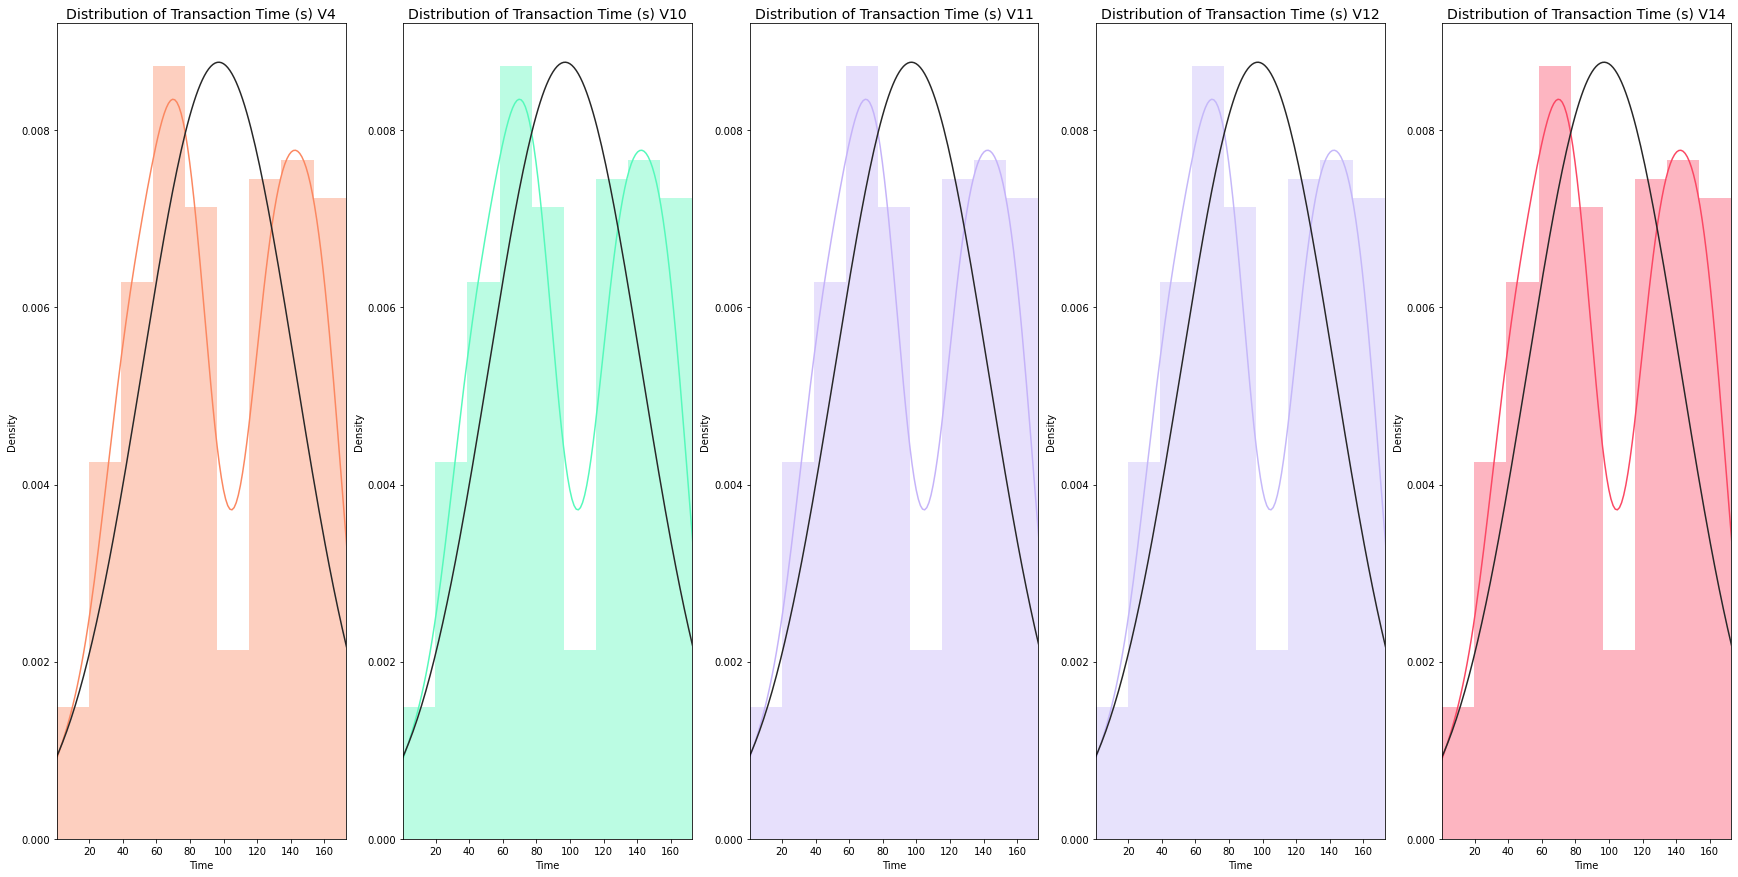

In [111]:
df_fraud = normalized_df[normalized_df['Class'] == 0]
colors = ['#FB8861', '#56F9BB', '#C5B3F9', '#C5B8F9','#FB4864']
fig, ax = plt.subplots(1, len(melhores_correlacoes), figsize=(30, 15))
i = 0
for item in melhores_correlacoes:
    amount = df_fraud['Time']/1000
    sns.distplot(amount, ax=ax[i], fit= norm, color= colors[i])
    title = "Distribution of Transaction Time (s) {}".format(item)
    ax[i].set_title(title, fontsize=14)
    ax[i].set_xlim([min(amount), max(amount)])
    i = i+1

### É possível notar que a distribuição dos registros fraudulentos é mais proximo de zero.

## Visualizando distribuição dos dados

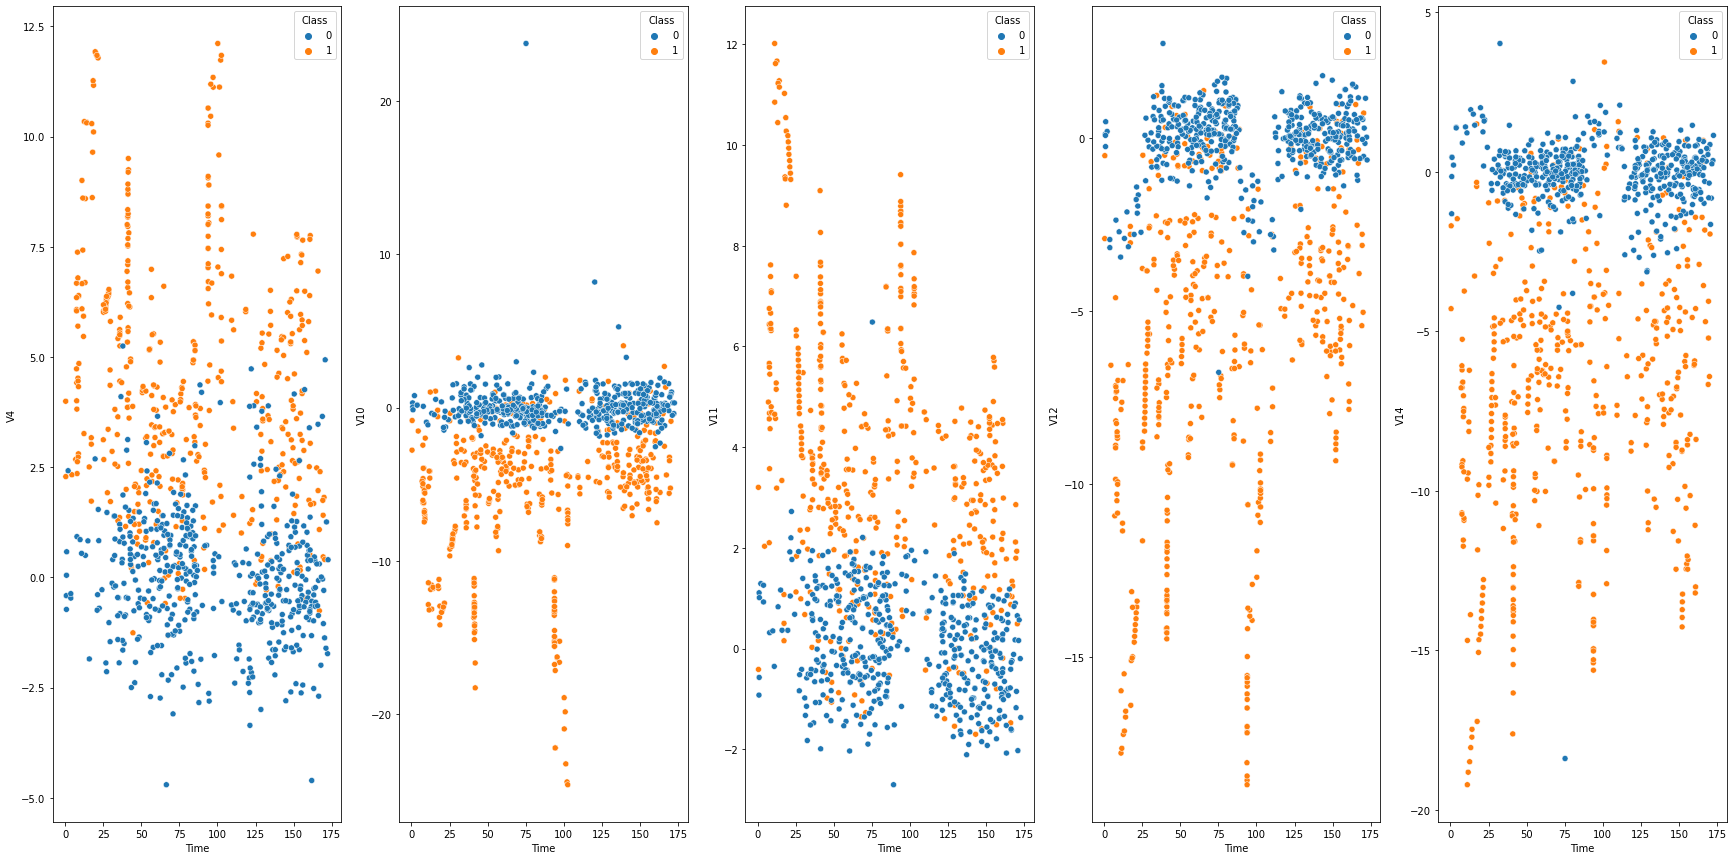

In [112]:
fig, ax = plt.subplots(1, len(melhores_correlacoes), figsize=(30, 15))
i = 0
amount = normalized_df['Time']/1000
for item in melhores_correlacoes:
     sns.scatterplot(data= normalized_df, x= amount, y= normalized_df[item], ax=ax[i], hue=normalized_df["Class"])
     title = "Distribution of Transaction Time (s) {}".format(item)
     i = i + 1

### A partir dasobservações é possível obervar uma grande relação entra valores dos conjuntos e também uma relação com o tempo de transação. Vamos usar essas colunas para tentar prever as fraudes.

OBS: É possível notar outliers nas distribuições, teremos que tratar isso antes de continuar

# Criando dataset das colunas com melhores correlações

In [113]:
melhores_correlacoes.append('Time')
melhores_correlacoes.append('Amount')
melhores_correlacoes.append('Class')

In [114]:
melhores_correlacoes

['V4', 'V10', 'V11', 'V12', 'V14', 'Time', 'Amount', 'Class']

In [115]:
transactions_df = normalized_df[melhores_correlacoes]
transactions_df

,V4,V10,V11,V12,V14,Time,Amount,Class
9179,6.689951,-11.561950,10.446847,-15.479052,-13.883779,13126.0,1.00,1
223618,7.232058,-4.400930,4.213213,-5.737815,-8.893726,143456.0,1.00,1
9487,10.330100,-11.797181,11.277921,-16.728339,-17.721638,14073.0,1.00,1
10497,3.024050,-0.554224,0.154921,-2.776757,-0.456077,17220.0,3.79,1
250761,7.334059,-5.258096,5.716319,-5.810407,-12.289133,155054.0,0.77,1
...,...,...,...,...,...,...,...,...
30792,1.093425,-0.030988,0.558853,0.803500,0.633566,36082.0,46.57,0
254619,-0.666043,0.334604,0.621847,0.358606,-0.107125,156824.0,8.99,0
154095,0.470267,-0.240190,1.952796,-1.245265,1.251221,100876.0,14.95,0
136926,0.133399,-0.286894,0.026788,1.098002,-0.070954,81937.0,5.40,0


# Tratando outliers

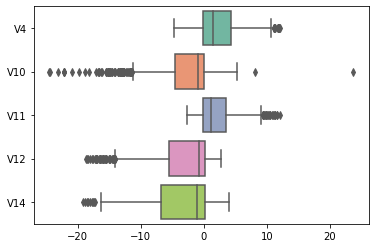

In [116]:
ax = sns.boxplot(data=transactions_df.drop(['Time','Amount', 'Class'], axis= 'columns'), orient="h", palette="Set2")

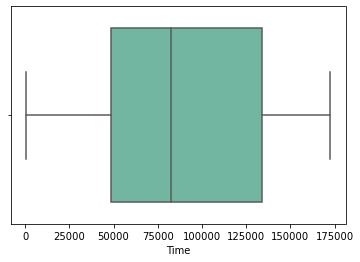

In [117]:
ax = sns.boxplot(x= transactions_df["Time"], orient="h", palette="Set2")

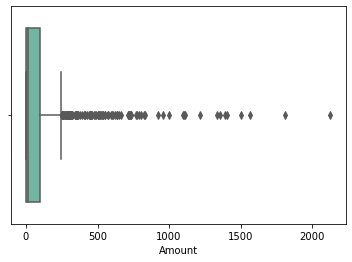

In [118]:
ax = sns.boxplot(x= transactions_df["Amount"], orient="h", palette="Set2")

In [119]:
transactions_df = transactions_df.reset_index(drop=True)
transactions_df

,V4,V10,V11,V12,V14,Time,Amount,Class
0,6.689951,-11.561950,10.446847,-15.479052,-13.883779,13126.0,1.00,1
1,7.232058,-4.400930,4.213213,-5.737815,-8.893726,143456.0,1.00,1
2,10.330100,-11.797181,11.277921,-16.728339,-17.721638,14073.0,1.00,1
3,3.024050,-0.554224,0.154921,-2.776757,-0.456077,17220.0,3.79,1
4,7.334059,-5.258096,5.716319,-5.810407,-12.289133,155054.0,0.77,1
...,...,...,...,...,...,...,...,...
979,1.093425,-0.030988,0.558853,0.803500,0.633566,36082.0,46.57,0
980,-0.666043,0.334604,0.621847,0.358606,-0.107125,156824.0,8.99,0
981,0.470267,-0.240190,1.952796,-1.245265,1.251221,100876.0,14.95,0
982,0.133399,-0.286894,0.026788,1.098002,-0.070954,81937.0,5.40,0


## z-Score

In [120]:
def z_score_method(df, variable_name):
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z.iloc[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_z = z_score_method(transactions_df, 'Amount')
print(outlier_z)

[54, 106, 141, 172, 180, 232, 235, 266, 293, 342, 401, 434, 436, 453, 460, 467, 631, 654, 724, 754, 818]


## Método de Tuskey

In [121]:
def tukeys_method(df, variable):
    # Recebe dois parâmetros: dataframe & variável de interesse como string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    # limites internos
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    # limites externos
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [122]:
melhores_correlacoes

['V4', 'V10', 'V11', 'V12', 'V14', 'Time', 'Amount', 'Class']

In [123]:
list_outliers_prob = []
list_outliers_poss = []
list_outliers_prob_unique = []
list_outliers_poss_unique = []
for columns in melhores_correlacoes:
    probable_outliers_tm, possible_outliers_tm = tukeys_method(transactions_df, columns)
    list_outliers_prob.append(probable_outliers_tm)
    list_outliers_poss.append(possible_outliers_tm)
    list_outliers_prob_unique = Union(list_outliers_prob_unique, probable_outliers_tm)
    list_outliers_poss_unique = Union(list_outliers_poss_unique, possible_outliers_tm)

### Array unificado com outliers de todas as colunas

In [124]:
print(len(list_outliers_prob_unique))

80


### Decidi usar apenas os outliers da coluna V10, pois assim não vou dropar tantas variaveis, visto que temo poucos registros para o treino.

In [125]:
out_liers_prob_v4, out_liers_possiveis_v4 = tukeys_method(transactions_df, 'V4')
print('Provaveis',out_liers_prob_v4)
print('Possiveis',out_liers_possiveis_v4)

Provaveis []
Possiveis [7, 28, 37, 41, 49, 57, 70, 80, 98, 157, 207, 244, 285, 362, 407, 414, 418]


In [126]:
out_liers_prob_v10, out_liers_possiveis_v10 = tukeys_method(transactions_df, 'V10')
print('Provaveis',out_liers_prob_v10)
print('Possiveis',out_liers_possiveis_v10)

Provaveis [7, 28, 51, 57, 73, 253, 289, 352, 414, 428, 469, 913]
Possiveis [0, 2, 7, 8, 18, 25, 28, 34, 37, 39, 41, 49, 51, 53, 57, 63, 69, 70, 73, 77, 80, 91, 92, 98, 99, 103, 107, 128, 132, 137, 138, 139, 140, 157, 170, 171, 181, 184, 185, 186, 193, 195, 198, 207, 223, 232, 237, 244, 253, 254, 283, 285, 287, 289, 307, 311, 350, 352, 362, 368, 377, 383, 386, 407, 414, 417, 418, 423, 425, 428, 433, 443, 444, 445, 452, 454, 463, 469, 477, 488, 913, 944]


In [127]:
out_liers_prob_v11, out_liers_possiveis_v11 = tukeys_method(transactions_df, 'V11')
print('Provaveis',out_liers_prob_v11)
print('Possiveis',out_liers_possiveis_v11)

Provaveis []
Possiveis [0, 2, 37, 41, 49, 53, 69, 70, 80, 185, 186, 195, 207, 232, 237, 244, 285, 311, 386, 401, 407, 418]


In [128]:
out_liers_prob_v12, out_liers_possiveis_v12 = tukeys_method(transactions_df, 'V12')
print('Provaveis',out_liers_prob_v12)
print('Possiveis',out_liers_possiveis_v12)

Provaveis []
Possiveis [0, 2, 21, 25, 37, 39, 41, 53, 69, 77, 103, 107, 128, 132, 137, 139, 185, 186, 195, 198, 207, 232, 237, 244, 254, 285, 307, 311, 312, 339, 347, 350, 368, 370, 383, 386, 417, 423, 425, 444, 454, 463, 488]


In [129]:
out_liers_prob_v14, out_liers_possiveis_v14 = tukeys_method(transactions_df, 'V14')
print('Provaveis',out_liers_prob_v14)
print('Possiveis',out_liers_possiveis_v14)

Provaveis []
Possiveis [2, 53, 69, 103, 185, 237, 311, 386, 913]


## Drop from index

In [130]:
transactions_df.drop(out_liers_prob_v10, axis=0, inplace=True)

In [131]:
print(out_liers_prob_v10)

[7, 28, 51, 57, 73, 253, 289, 352, 414, 428, 469, 913]


In [132]:
print(transactions_df)

            V4        V10        V11        V12        V14      Time  Amount  \
0     6.689951 -11.561950  10.446847 -15.479052 -13.883779   13126.0    1.00   
1     7.232058  -4.400930   4.213213  -5.737815  -8.893726  143456.0    1.00   
2    10.330100 -11.797181  11.277921 -16.728339 -17.721638   14073.0    1.00   
3     3.024050  -0.554224   0.154921  -2.776757  -0.456077   17220.0    3.79   
4     7.334059  -5.258096   5.716319  -5.810407 -12.289133  155054.0    0.77   
..         ...        ...        ...        ...        ...       ...     ...   
979   1.093425  -0.030988   0.558853   0.803500   0.633566   36082.0   46.57   
980  -0.666043   0.334604   0.621847   0.358606  -0.107125  156824.0    8.99   
981   0.470267  -0.240190   1.952796  -1.245265   1.251221  100876.0   14.95   
982   0.133399  -0.286894   0.026788   1.098002  -0.070954   81937.0    5.40   
983  -3.355574  -1.671112  -0.584381   0.329016   0.118202  121309.0   90.00   

     Class  
0        1  
1        1  


# Train Test Split dos dados

In [133]:
from sklearn.model_selection import train_test_split
X = transactions_df.drop('Class', axis='columns')
y = transactions_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [134]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(651, 7)
(321, 7)
(651,)
(321,)


In [135]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=5).fit(X_train, y_train)
treshold = 0.5

In [136]:
log_reg.predict_proba(X_test)[:,1]

array([0.01020958, 0.11096952, 0.04714678, 0.00974319, 0.02282957,
       0.99994074, 0.99970991, 0.78014513, 0.98539718, 0.99999774,
       0.11737246, 0.05754741, 0.34131123, 0.0296754 , 0.99997111,
       0.99999979, 0.99887087, 0.99998786, 0.99999997, 0.04629907,
       0.01186212, 0.06176734, 1.        , 0.99999952, 0.93613597,
       0.08052246, 0.82738138, 0.99261578, 1.        , 1.        ,
       0.08834442, 0.98927185, 0.99386458, 0.01067818, 0.45305028,
       0.00856081, 0.97038127, 0.98203243, 0.85550156, 0.17104754,
       0.24572391, 0.16695474, 0.99908675, 0.97527495, 0.99847686,
       0.99999988, 0.99999902, 1.        , 1.        , 0.99999873,
       0.99764858, 1.        , 0.02482932, 0.99761999, 0.01865102,
       0.11302364, 0.99999998, 0.22067702, 0.8282632 , 0.08624595,
       0.99975439, 0.01363898, 0.99996835, 0.99999985, 0.05867403,
       0.99998458, 0.03024675, 0.23427907, 0.0103313 , 0.0586939 ,
       0.25481757, 0.99959508, 0.9970213 , 0.11736577, 0.99690

In [137]:
pred_tranform = (log_reg.predict_proba(X_test)[:,1] > treshold).astype(int)

In [138]:
score = log_reg.score(X_test, y_test)
print("Test Accuracy Score", score)

Test Accuracy Score 0.9470404984423676


Aparentemente a accurácia está boa, vou fazer uma validação cruzada.

In [139]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.87878788 0.89230769 0.93846154 0.90769231 0.90769231 0.87692308
 0.93846154 0.84615385 0.95384615 0.92307692]


C:\Users\Philip Guedes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8461538461538461, 0.9063403263403262, 0.9538461538461539)

Vamos utilizar nosso modelo para treinar o teste do Kaggle